In [1]:
import cv2
import numpy as np
from numpy import shape
import matplotlib.pyplot as plt 
from image_extractor import feature_extract, statistic_analysis

image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (17).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (1).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (16).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Brown/image (3).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (71).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (1).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (7).JPG'
# image_dir = 'D:/Thesis_data/mlp_data/training_img/Compartmentalized_Brown/image(3).JPG'
# image_dir  = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (10).JPG'

plt.rcParams['figure.dpi'] = 102.46 

In [2]:
extractor = feature_extract()
# image_bgr = cv2.imread(image_dir)
# extractor.extract(image_bgr)
extractor.pre_process2(image_dir)
extractor.extract_haralick()


In [3]:
shape(extractor.red_haralick)

(56,)

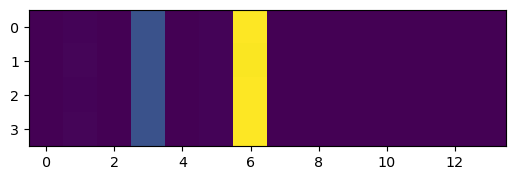

In [10]:
plt.imshow(np.reshape(extractor.blue_haralick, (4,14)))

In [6]:
print(extractor.red_haralick)

[ 5.00860432e-01  5.70241790e+01  9.81850081e-01  1.57092108e+03
  7.56099477e-01  4.65141267e+01  6.22666012e+03  3.08384245e+00
  4.31271674e+00  2.74149081e-03  2.06024609e+00 -4.44746639e-01
  9.56621158e-01  4.81331562e+00  4.99469440e-01  7.48003033e+01
  9.76222693e-01  1.57293472e+03  7.49701972e-01  4.66051524e+01
  6.21693857e+03  3.09021673e+00  4.38135999e+00  2.71218529e-03
  2.14258495e+00 -4.22534023e-01  9.50977671e-01  5.06961014e+00
  5.00907562e-01  4.79270426e+01  9.84745560e-01  1.57092108e+03
  7.61865304e-01  4.65141267e+01  6.23575726e+03  3.08671679e+00
  4.27376228e+00  2.76712198e-03  2.00060172e+00 -4.58794409e-01
  9.59940418e-01  4.61619889e+00  4.99616222e-01  6.95406114e+01
  9.77894629e-01  1.57293472e+03  7.51060895e-01  4.66051524e+01
  6.22219826e+03  3.09038258e+00  4.36938635e+00  2.71529672e-03
  2.12735411e+00 -4.26845016e-01  9.52166833e-01  5.00981692e+00]
